# Confidence Intervals and Bootstrap

In [79]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

## Question 2: Speed of Light

Given the **measurements** of the speed of light over **3 days**, find the **confidence intervals** for the speed of light.

In [7]:
data = np.genfromtxt('data/newcomb.dat', names=True, delimiter='', encoding='utf-8')
measurements = []
for item in data:
    measurements.append(item[1])
n = len(measurements)
x_bar = np.mean(measurements)
print(f'There are {n} samples')
print('First 5 measurements: ', measurements[:5])
print('The sample mean is:', x_bar)
print('')

squared_sum = 0
for x in measurements:
    squared_sum += (x-x_bar)**2
var = squared_sum / (n-1)
print('The sample varaince of the observed data is: ', round(var,3))

se = np.sqrt(var/n)
#se = stats.sem(measurements)
print('The standard error of the observed data is: ', round(se,3))
print('')

alpha = 0.05
z_score = stats.norm.ppf(1-alpha/2, loc=0, scale=1)
ci = [x_bar-z_score*se, x_bar+z_score*se]
print(f'The {round(100*(1-alpha))}% confidence interval is: ', [round(x,3) for x in ci])

There are 66 samples
First 5 measurements:  [299811.9059, 299836.059, 299751.5403, 299860.2159, 299739.4701]
The sample mean is: 299833.552530303

The sample varaince of the observed data is:  16906.692
The standard error of the observed data is:  16.005

The 95% confidence interval is:  [299802.183, 299864.922]


**Assumptions**:

1. the sample mean is normally distributed
2. the sample mean is an unbiased estimator of the population mean
3. the population variance is approxied by the sample variance

## Question 5: Negative Mean of a Normal

In [13]:
n = 1000
X = np.random.normal(loc=-1, scale=1, size=n)

X_bar = np.mean(X)
mu_hat = np.max([0, X_bar])
print('The sample mean is: ', round(X_bar,4))

alpha = 0.05
z_score = stats.norm.ppf(1-alpha/2, loc=0, scale=1)
ci = [mu_hat-z_score/np.sqrt(n), mu_hat+z_score/np.sqrt(n)]
print(f'The {round(100*(1-alpha))}% confidence interval is: ', [round(x,3) for x in ci])

The sample mean is:  -0.9893
The 95% confidence interval is:  [-0.062, 0.062]


## Question 6: Test, then Infer

In [24]:
mu_list = np.random.uniform(low=-1, high=1, size=100)

n, alpha, count = 1000, 0.05, 0
for mu in mu_list:
    X = np.random.normal(loc=mu, scale=1, size=n)
    X_bar = np.mean(X)
    z_score = stats.norm.ppf(1-alpha/2, loc=0, scale=1)
    if (X_bar-0)*np.sqrt(n) < z_score:
        L = X_bar - z_score / np.sqrt(n)
        U = X_bar + z_score / np.sqrt(n)
        
        if count <= 10:
            print(f'The sample mean is {round(X_bar,4)} and the {round(100*(1-alpha))}% confidence interval is: {[round(L,3),round(U,3)]}')
        count += 1

print()
print('The fraction of passed test is: ', round(count/100, 3))

The sample mean is -0.8704 and the 95% confidence interval is: [-0.932, -0.808]
The sample mean is -0.3743 and the 95% confidence interval is: [-0.436, -0.312]
The sample mean is -0.5264 and the 95% confidence interval is: [-0.588, -0.464]
The sample mean is -0.3932 and the 95% confidence interval is: [-0.455, -0.331]
The sample mean is -0.0019 and the 95% confidence interval is: [-0.064, 0.06]
The sample mean is -0.7276 and the 95% confidence interval is: [-0.79, -0.666]
The sample mean is -0.3359 and the 95% confidence interval is: [-0.398, -0.274]
The sample mean is -0.6715 and the 95% confidence interval is: [-0.733, -0.609]
The sample mean is -0.5423 and the 95% confidence interval is: [-0.604, -0.48]
The sample mean is -0.2048 and the 95% confidence interval is: [-0.267, -0.143]
The sample mean is -0.8353 and the 95% confidence interval is: [-0.897, -0.773]

The fraction of passed test is:  0.51


## Question 7: Bootstrap Pivotal / Percentile CI

In [75]:
data_bio = np.genfromtxt('data/placebo.dat', names=True, delimiter='', encoding='utf-8')
placebo, old_treatment, new_treatment = [], [], []
for item in data_bio:
    placebo.append(item[1])
    old_treatment.append(item[2])
    new_treatment.append(item[3])
    
E_Y = np.mean(new_treatment) - np.mean(old_treatment)
E_Z = np.mean(old_treatment) - np.mean(placebo)
theta_hat = E_Y / E_Z
print('The theta from the observed data is: ', round(theta_hat, 4))

B = 1000
R, theta = [], []
for _ in range(B):
    placebo_resample = np.random.choice(placebo, size=len(placebo), replace=True)
    old_resample = np.random.choice(old_treatment, size=len(old_treatment), replace=True)
    new_resample = np.random.choice(new_treatment, size=len(new_treatment), replace=True)
    Y_bar = np.mean(new_resample) - np.mean(old_resample)
    Z_bar = np.mean(old_resample) - np.mean(placebo_resample)
    theta_i = Y_bar / Z_bar
    theta.append(theta_i)
    R_i = theta_i - theta_hat
    R.append(R_i)

alpha = 0.05
se = stats.sem(theta)
print('The bootstrap standard error is: ', round(se, 4))
z_score = stats.norm.ppf(1-alpha/2, loc=0, scale=1)
ci_pivotal = [theta_hat-z_score*se, theta_hat+z_score*se]
print(f'The {round(100*(1-alpha))}% bootstrap normal-based confidence interval is: ', [round(x,4) for x in ci_pivotal])

R = sorted(R)
L = theta_hat - R[int(B*(1-alpha/2))]
U = theta_hat - R[int(B*(alpha/2))]
print(f'The {round(100*(1-alpha))}% bootstrap pivotal confidence interval is: ', [round(L,4),round(U,4)])

theta = sorted(theta)
ci_percentile = [theta[int(B*(alpha/2))],theta[int(B*(1-alpha/2))]]
print(f'The {round(100*(1-alpha))}% bootstrap percentile confidence interval is: ', [round(x,4) for x in ci_percentile])

The theta from the observed data is:  -0.073
The bootstrap standard error is:  0.0871
The 95% bootstrap normal-based confidence interval is:  [-0.2437, 0.0976]
The 95% bootstrap pivotal confidence interval is:  [-1.9176, 0.5633]
The 95% bootstrap percentile confidence interval is:  [-0.7094, 1.7715]


## Question 9: Parametric Bootstrap

θ_hat form the observed data:  0.983798827834334

Probability of having the bootstrap theta equal to theta hat: 
Parametric:  0.0
Non-Parametric:  0.635


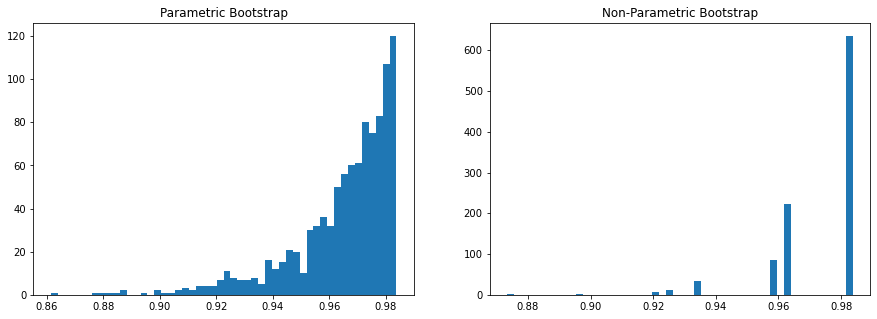

In [106]:
n, theta = 50, 1
X = np.random.uniform(low=0, high=theta, size=n)
theta_hat = np.max(X)
print('θ_hat form the observed data: ', theta_hat)
print()

B = 1000
theta_param, theta_nonparam = [], []
for _ in range(B):
    X_resample_nonparam = np.random.choice(X, size=n, replace=True)
    X_resample_param = np.random.uniform(low=0, high=theta_hat, size=n)
    theta_param.append(np.max(X_resample_param))
    theta_nonparam.append(np.max(X_resample_nonparam))

print('Probability of having the bootstrap theta equal to theta hat: ')
print('Parametric: ', len([x for x in theta_param if x == theta_hat])/B)
print('Non-Parametric: ', len([x for x in theta_nonparam if x == theta_hat])/B)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].hist(theta_param, bins=50)
axes[0].set_title('Parametric Bootstrap')
axes[1].hist(theta_nonparam, bins=50)
axes[1].set_title('Non-Parametric Bootstrap')
plt.show()

## Question 10: Studentised Pivotal Interval

In [121]:
data_bio = np.genfromtxt('data/placebo.dat', names=True, delimiter='', encoding='utf-8')
placebo, old_treatment, new_treatment = [], [], []
for item in data_bio:
    placebo.append(item[1])
    old_treatment.append(item[2])
    new_treatment.append(item[3])
    
E_Y = np.mean(new_treatment) - np.mean(old_treatment)
E_Z = np.mean(old_treatment) - np.mean(placebo)
theta_hat = E_Y / E_Z
print('The theta from the observed data is: ', round(theta_hat, 4))

B = 1000
Z_stars, theta_stars = [], []
for _ in range(B):
    placebo_resample = np.random.choice(placebo, size=len(placebo), replace=True)
    old_resample = np.random.choice(old_treatment, size=len(old_treatment), replace=True)
    new_resample = np.random.choice(new_treatment, size=len(new_treatment), replace=True)
    Y_bar = np.mean(new_resample) - np.mean(old_resample)
    Z_bar = np.mean(old_resample) - np.mean(placebo_resample)
    if Z_bar == 0:
        theta_i = 0
    else:
        theta_i = Y_bar / Z_bar
    theta_stars.append(theta_i)
    
    T = []
    for _ in range(B):
        placebo_resample_2 = np.random.choice(placebo_resample, size=len(placebo), replace=True)
        old_resample_2 = np.random.choice(old_resample, size=len(old_treatment), replace=True)
        new_resample_2 = np.random.choice(new_resample, size=len(new_treatment), replace=True)
        Y_bar_2 = np.mean(new_resample_2) - np.mean(old_resample_2)
        Z_bar_2 = np.mean(old_resample_2) - np.mean(placebo_resample_2)
        if Z_bar_2 == 0:
            T_i = 0
        else:
            T_i = Y_bar_2 / Z_bar_2
        T.append(T_i)
    se_i = stats.sem(T)

    Z_star = (theta_i - theta_hat) / se_i
    Z_stars.append(Z_star)

Z_stars = sorted(Z_stars)
se_boot = stats.sem(theta_stars)
ci_studentised = [theta_hat-se_boot*Z_stars[int(B*(1-alpha/2))], theta_hat-se_boot*Z_stars[int(B*(alpha/2))]]

print(f'The {round(100*(1-alpha))}% bootstrap normal-based confidence interval is: ', [round(x,4) for x in ci_pivotal])
print(f'The {round(100*(1-alpha))}% bootstrap pivotal confidence interval is: ', [round(L,4),round(U,4)])
print(f'The {round(100*(1-alpha))}% bootstrap percentile confidence interval is: ', [round(x,4) for x in ci_percentile])
print(f'The {round(100*(1-alpha))}% bootstrap studentised pivotal interval is: ', [round(x,4) for x in ci_studentised])

The theta from the observed data is:  -0.073
The 95% bootstrap normal-based confidence interval is:  [-0.4571, 0.311]
The 95% bootstrap pivotal confidence interval is:  [-2.4081, 0.6107]
The 95% bootstrap percentile confidence interval is:  [-0.7568, 2.262]
The 95% bootstrap studentised pivotal interval is:  [-4.904, 16.1461]
